### Notes
much of the code was taken from https://machinelearningmastery.com/ 
some of the code including the upsampling and learning curves was taken form the machine learning with python github repo
various other resources also provided parts of the code

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer, f1_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

### Import Data

In [ ]:
data = pd.read_csv("format_variables_output4.csv")

In [3]:
# drop the entries for new members who joined leaving renewals and cancelations only
data = data[data['Target']!=2]

show the balance of the data set the renewal variable (1) has over 90% while cancelations are only 9.2%
This imbalance in the data set will be a challenge of this predicitive model.

In [5]:
data['Target'].value_counts(normalize=True)

1    0.907453
0    0.092547
Name: Target, dtype: float64

In [6]:
data.columns

Index(['Unnamed: 0', 'MemberName', 'NF_Year', 'ACS_Year', 'JoinDate',
       'ExpireDate', 'MemberStatus', 'State', 'StateName', 'StateCode',
       'Region', 'SummaryLevel', 'CombinedFips', 'Target', 'TotalPopulation',
       'MedianHouseholdIncome', 'MedianAge', 'NonHispanicWhites',
       'TotalWorkers', 'UseCar', 'PopOver25', 'Bachelors', 'Agriculture',
       'Construction', 'Manufacturing', 'WholesaleTrade', 'Retail',
       'Transportation', 'Information', 'Finance', 'Professional', 'Education',
       'Arts', 'OtherServices', 'PublicAdministration', 'ArmedForces',
       'Years as Member', '1', '10', '12', '13', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41',
       '42', '44', '45', '46', '47', '48', '49', '5', '50', '51', '53', '54',
       '55', '56', '6', '8', '9', 'Pop_Den', 'binned_pop_den',
       'MedianIncomeAdjusted', '%NonHispanicW

### Lets run a random Forest Model with some new variables including: Population density, years as member

In [7]:
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den','Years as Member']]

data1.head()

Target  TotalPopulation  MedianAge  MedianIncomeAdjusted  \
0       1          30777.0       37.6               87259.0   
1       1          30975.0       38.6               84939.0   
2       1          31244.0       38.6               84623.0   
3       1          31636.0       37.8               84766.0   
4       0          31897.0       37.3               86202.0   

   %NonHispanicWhites  %DrivetoWork  %Bachelors  Pop_Den  Years as Member  
0            0.697924      0.777589    0.236847     11.6              0.0  
1            0.681162      0.771851    0.222308     11.6              1.0  
2            0.677026      0.799173    0.227890     11.6              2.0  
3            0.672715      0.815890    0.219309     11.6              3.0  
4            0.667649      0.823887    0.224010     11.6              4.0

In [8]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [10]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rfc_pred = rfc.predict(X_test)

In [12]:
print(confusion_matrix(y_test,rfc_pred))

[[   2  404]
 [   8 3873]]


In [13]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.20      0.00      0.01       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.90      4287
   macro avg       0.55      0.50      0.48      4287
weighted avg       0.84      0.90      0.86      4287



Lets experiment with different values for N to see if we can improve the model.  

In [14]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[   3  403]
 [   7 3874]]
              precision    recall  f1-score   support

           0       0.30      0.01      0.01       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.90      4287
   macro avg       0.60      0.50      0.48      4287
weighted avg       0.85      0.90      0.86      4287



In [15]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[   9  397]
 [  15 3866]]
              precision    recall  f1-score   support

           0       0.38      0.02      0.04       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.90      4287
   macro avg       0.64      0.51      0.50      4287
weighted avg       0.86      0.90      0.86      4287



In [16]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 115  291]
 [ 606 3275]]
              precision    recall  f1-score   support

           0       0.16      0.28      0.20       406
           1       0.92      0.84      0.88      3881

    accuracy                           0.79      4287
   macro avg       0.54      0.56      0.54      4287
weighted avg       0.85      0.79      0.82      4287



The recall for cancellations was super low only 1-2%.  The last model with only 2 n estimators had better recall but much lower precision.  Lets try with only population density as a new variable. 

In [4]:
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den']]
data1.head()

Target  TotalPopulation  MedianAge  MedianIncomeAdjusted  \
0       1          30777.0       37.6               87259.0   
1       1          30975.0       38.6               84939.0   
2       1          31244.0       38.6               84623.0   
3       1          31636.0       37.8               84766.0   
4       0          31897.0       37.3               86202.0   

   %NonHispanicWhites  %DrivetoWork  %Bachelors  Pop_Den  
0            0.697924      0.777589    0.236847     11.6  
1            0.681162      0.771851    0.222308     11.6  
2            0.677026      0.799173    0.227890     11.6  
3            0.672715      0.815890    0.219309     11.6  
4            0.667649      0.823887    0.224010     11.6

In [5]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

In [19]:
# run only with new variable pop_density 
print(confusion_matrix(y_test,rfc_pred))

[[  20  386]
 [  18 3863]]


In [20]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.53      0.05      0.09       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.72      0.52      0.52      4287
weighted avg       0.87      0.91      0.87      4287



Lets try with different values of N like above.  

In [6]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

In [7]:
# run only with new variable pop_density 
print(confusion_matrix(y_test,rfc_pred))

[[  17  389]
 [  15 3866]]


In [8]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.53      0.04      0.08       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.72      0.52      0.51      4287
weighted avg       0.87      0.91      0.87      4287



In [24]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  19  387]
 [  15 3866]]
              precision    recall  f1-score   support

           0       0.56      0.05      0.09       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.73      0.52      0.52      4287
weighted avg       0.88      0.91      0.87      4287



In [25]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  95  311]
 [ 616 3265]]
              precision    recall  f1-score   support

           0       0.13      0.23      0.17       406
           1       0.91      0.84      0.88      3881

    accuracy                           0.78      4287
   macro avg       0.52      0.54      0.52      4287
weighted avg       0.84      0.78      0.81      4287



### Results with only 1 new variable were better than with years as member.  The f1 score for cancelations is improved from 1 or 2 to 9 with 50-100 values for N.   We will use population density as the only new variable.  

## Grid Search

The first grid search is run with scaled variables and balanced accuracy score as the scoring criteria.  The cross validation is 5 fold because these grid searches take over an hour.  

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
rf =  RandomForestClassifier()

param_grid = [{'n_estimators':  [2,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, None],
    'criterion' :['gini', 'entropy']}]

balanced_accuracy_score = make_scorer(balanced_accuracy_score)

gs = GridSearchCV(rf, param_grid=param_grid, scoring= balanced_accuracy_score, cv=5, n_jobs=-1, verbose = 1)

gs = gs.fit(X_train, y_train)



print(gs.best_score_)
print(gs.best_params_)


Fitting 5 folds for each of 3510 candidates, totalling 17550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

0.5489221053802158
{'criterion': 'entropy', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}


Lets use the hyperparameters that the grid search chose as optimal.

In [41]:
clf = RandomForestClassifier(n_estimators = 2, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', max_depth= 40, max_features = 'auto', ).fit(X_train, y_train)

In [42]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[ 101  305]
 [ 608 3273]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.25      0.18       406
           1       0.91      0.84      0.88      3881

    accuracy                           0.79      4287
   macro avg       0.53      0.55      0.53      4287
weighted avg       0.84      0.79      0.81      4287



Results were simular to above when n = 2.  Lets try with 100 trees.  

In [44]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', max_depth= 40, max_features = 'auto', ).fit(X_train, y_train)

In [45]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[  19  387]
 [  10 3871]]
              precision    recall  f1-score   support

           0       0.66      0.05      0.09       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.78      0.52      0.52      4287
weighted avg       0.89      0.91      0.87      4287



The results are simular to above.  More trees gives higher precision and less recall for cancelations.  I prefer more trees because with precison of 14% we are only slightly better than random (9%). For imbalanced data sets accuracy is a poor measure lets use area under roc curve as the scoring criteria.  

In [15]:
rf =  RandomForestClassifier()

param_grid = [{'n_estimators':  [2,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, None],
    'criterion' :['gini', 'entropy']}]

gs = GridSearchCV(rf, param_grid=param_grid, scoring= 'roc_auc', cv=5, n_jobs=-1, verbose = 1)

gs = gs.fit(X_train, y_train)



print(gs.best_score_)
print(gs.best_params_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 54.7min finished


0.6250568120525346
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Notice how the best score had gone up from almost 55 to almost 63. Lets run the model with the  hyperparameters from the grid search.

In [46]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_leaf=2, min_samples_split =2, criterion =  'entropy', 
                             max_depth= None, max_features = 'log2', ).fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[  10  396]
 [   6 3875]]
              precision    recall  f1-score   support

           0       0.62      0.02      0.05       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.77      0.51      0.50      4287
weighted avg       0.88      0.91      0.87      4287



#### The precision is pretty good but recall is even worse than earlier.  

## learning curve

The curve is graphed based on the above model which was chosen from the grid search.  

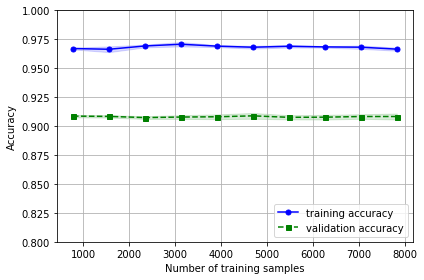

In [48]:
from sklearn.model_selection import learning_curve
    

# Plot Learning Curve
    # Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_leaf=2, min_samples_split =2, criterion =  'entropy', 
                             max_depth= None, max_features = 'log2', ), 
                                            X_train,  y_train, cv=10, scoring='accuracy', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))



train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()

#### Results:
The learning curved was graphed several times with different hyperparameters with and without scaled variables.  The results were all simular to what is seen above.  The acuracy does not exceed 91% and adding more data doesn't seem to help.  91% accuracy is poor for an imblanced data set with 91% of the entries belonging to the majority class.  

### roc curve

Lets graph an roc curve with the  model to see how much predictive power the model has.

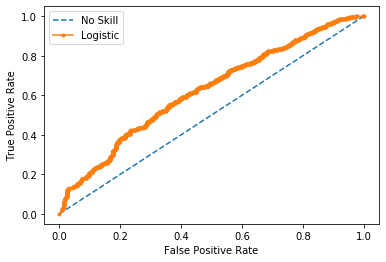

In [49]:
from sklearn.metrics import roc_curve

model = clf  # this is the model above from our grid search  
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic') # this is the wrong label disregard
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

From the roc graph it looks like the model did better than the logistic regression model.  The best model from the grid search got .62 which is higher than the logisitc regression model. 

RF: f1=0.951 auc=0.938


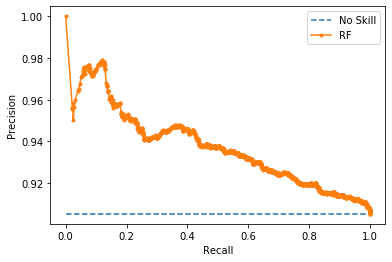

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# predict class values
y_pred = clf.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, yhat)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='RF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

We can see the precision recall tradeoff.  Note the recall here is well above 90% but this includes the positives.  It does not tell us about recall for the minority class which is what we are most interested in.

# Imbalanced Classification 

Getting useful results from an imbalanced data set like this one can be challenging.  Different methodologies can be applied to ty and overcome this issue.  Lets try some of them.  

### try different classification thresholds
We can change the threshold the model uses to decide whether the member is likely to cancel or renew.  The default threshold is 50%.  There are different ways to calculate what maybe a more appropriate threshold. This code is from  from https://machinelearningmastery.com/

In [53]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold this takes into account the balance of specetivity and sensitivity 
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold with Youden J=%f' % (best_thresh))

Best Threshold=0.924667, G-Mean=0.593
Best Threshold with Youden J=0.927714


In [54]:
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.475333, F-Score=0.951


In [57]:
# evaluate the 3 different thresholds to see which has the highest f1 score

# keep probabilities for the positive outcome only
probs = yhat
# define thresholds
thresholds = [.475,.924667,927714]
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

[0.9509563511525257, 0.7052783571313973, 0.0]
Threshold=0.475, F-Score=0.95096


In [66]:
# Define a function which will apply threshold to positive probabilities to create labels of 
# of classified as 0 or 1 depending on if it is above or bleow the custom threshold
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int') # true will return 1 false return 0

Lets try different thresholds to see if we can create a better model.

In [59]:
print(classification_report(y_test, to_labels(probs, .475))) 

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.83      0.51      0.50      4287
weighted avg       0.89      0.91      0.86      4287



In [60]:
print(classification_report(y_test, to_labels(probs, .924))) 

              precision    recall  f1-score   support

           0       0.13      0.61      0.21       406
           1       0.93      0.57      0.71      3881

    accuracy                           0.57      4287
   macro avg       0.53      0.59      0.46      4287
weighted avg       0.86      0.57      0.66      4287



Lower thresholds mean less negative labels which raises the precision on the cancelations and lowers the recall.  A higher threshold increases the recall as it is harder to get a positive label but of course the precision is lower.  The total f1 score for negatives is improved but the precision has droped too low. 

In [63]:
print(classification_report(y_test, to_labels(probs, .85))) 

              precision    recall  f1-score   support

           0       0.15      0.30      0.20       406
           1       0.92      0.83      0.87      3881

    accuracy                           0.78      4287
   macro avg       0.54      0.56      0.54      4287
weighted avg       0.85      0.78      0.81      4287



In [65]:
print(classification_report(y_test, to_labels(probs, .8))) 

              precision    recall  f1-score   support

           0       0.17      0.19      0.18       406
           1       0.91      0.90      0.91      3881

    accuracy                           0.83      4287
   macro avg       0.54      0.55      0.54      4287
weighted avg       0.84      0.83      0.84      4287



#### Conclusion:
Changing the threshold didn't solve the problem and produce a useful model.  It may be something to come back to and combine with other methods and models if we can get a pretty good model this is a way to tweak the results,

## Resample the data set to deal with class imbalance with upsampling

In [6]:
data1['Target'].value_counts()

1    11786
0     1202
Name: Target, dtype: int64

In [7]:
X_imb =  data1.drop(columns=['Target']).values
y_imb = data1['Target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb , test_size=0.33, random_state=42)

The split was done before the upsample. The upsampling was done only on the training data not the testing data.

In [9]:
from sklearn.utils import resample

print('Number of class 0 samples before:', X_train[y_train == 0].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

Number of class 0 samples before: 802
Number of class 0 samples after: 7899


In [10]:
# after increasing the number of cancelations the training data is merged with the renewals. 
X_train = np.vstack((X_train[y_train == 1], X_upsampled))
y_train = np.hstack((y_train[y_train == 1], y_upsampled))

In [11]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  38  362]
 [  92 3795]]
              precision    recall  f1-score   support

           0       0.29      0.10      0.14       400
           1       0.91      0.98      0.94      3887

    accuracy                           0.89      4287
   macro avg       0.60      0.54      0.54      4287
weighted avg       0.86      0.89      0.87      4287



This gives us more balance between recall and precision but not a great model.  Lets try to tweak it.  

### Run a grid search combining upsampling with tuning 

The grid search was run with scalled data using area under roc curve as the scoring criteria.  5 fold cross validation was used becasue the searches are very slow.  

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
rf =  RandomForestClassifier()

param_grid = [{'n_estimators':  [2,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, None],
    'criterion' :['gini', 'entropy']}]

gs = GridSearchCV(rf, param_grid=param_grid, scoring= 'roc_auc', cv=5, n_jobs=-1, verbose = 1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 62.1min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 67.4min finished


0.9996003605024567
{'criterion': 'entropy', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [19]:
gs.best_estimator_
grid_predictions = gs.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  37  318]
 [ 105 3437]]
              precision    recall  f1-score   support

           0       0.26      0.10      0.15       355
           1       0.92      0.97      0.94      3542

    accuracy                           0.89      3897
   macro avg       0.59      0.54      0.55      3897
weighted avg       0.86      0.89      0.87      3897



Results are basically the same as the first model run with upsampling.  Note the best score from the grid search was really high.

## Learning Curve for upsampled data set

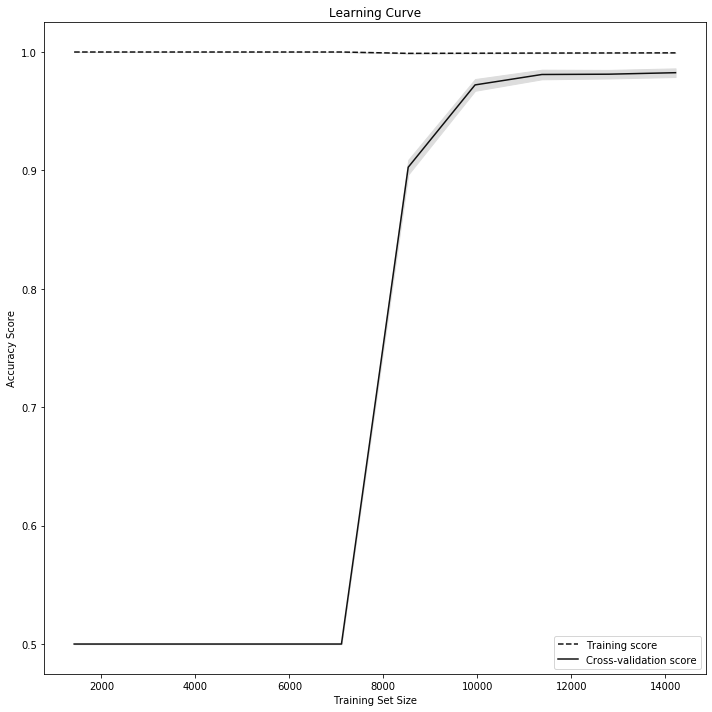

In [14]:
# Plot Learning Curve
    # Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 50, random_state = 0,
                                min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', ), 
                                            X_train,  y_train, cv=10, scoring='accuracy', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



 # Draw lines
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot 
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

### Results:
We can see that at 7000 entries the accuracy increase dramatically and then levels off after 11,000.  lets try to increase the training size to increase accuracy.  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb , test_size=0.15, random_state=42)


print('Number of class 0 samples before:', X_train[y_train == 0].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

X_train = np.vstack((X_train[y_train == 1], X_upsampled))
y_train = np.hstack((y_train[y_train == 1], y_upsampled))


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Number of class 0 samples before: 1026
Number of class 0 samples after: 10013


Note the trying size previoulsy was only 7000 now we are over 10k. We will use the same model that was used for the learning curve.

In [16]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', ).fit(X_train, y_train)

In [17]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[  20  156]
 [  55 1718]]
              precision    recall  f1-score   support

           0       0.27      0.11      0.16       176
           1       0.92      0.97      0.94      1773

    accuracy                           0.89      1949
   macro avg       0.59      0.54      0.55      1949
weighted avg       0.86      0.89      0.87      1949



#### lets make a learning curve with different criteria of scoring now we will use f1 score.

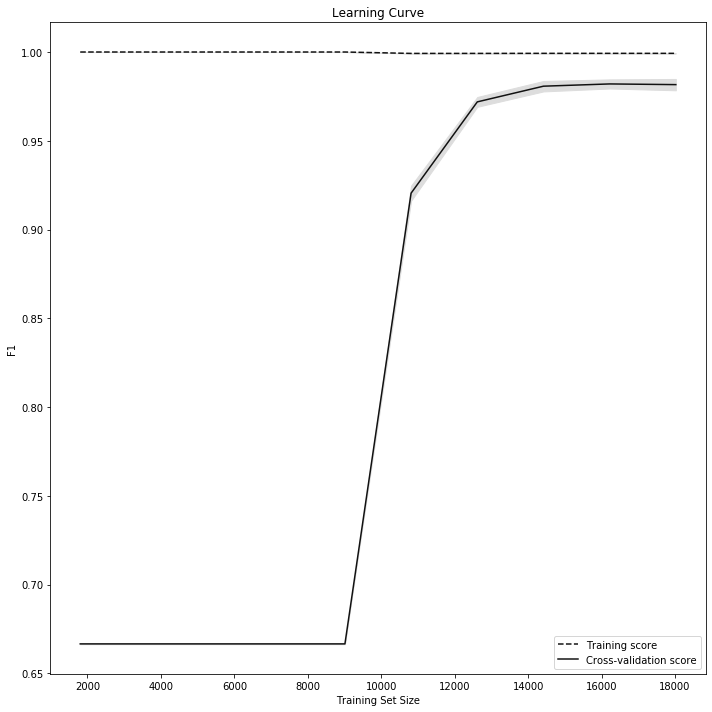

In [18]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 50, random_state = 0,
                                min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', ), 
                                            X_train,  y_train, cv=10, scoring='f1', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# Draw lines
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot 
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("F1"), plt.legend(loc="best")
plt.tight_layout()


  We can see from the scale at the bottom the f1 score increase only once the training size gets to 9000 and doesn't level off until around 13k.  Lets see if we can generate an even bigger training set.

In [19]:
# test size is very small to leave a bigger training set
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb , test_size=0.10, random_state=42)


print('Number of class 0 samples before:', X_train[y_train == 0].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

X_train = np.vstack((X_train[y_train == 1], X_upsampled))
y_train = np.hstack((y_train[y_train == 1], y_upsampled))



from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

clf = RandomForestClassifier(n_estimators = 50, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', ).fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Number of class 0 samples before: 1094
Number of class 0 samples after: 10595
[[  15   93]
 [  30 1161]]
              precision    recall  f1-score   support

           0       0.33      0.14      0.20       108
           1       0.93      0.97      0.95      1191

    accuracy                           0.91      1299
   macro avg       0.63      0.56      0.57      1299
weighted avg       0.88      0.91      0.89      1299



Things are improving.  The f1 score for the cancellations is rising and so is the recall.  
#### We only used a sample size of 10k cancellations including upsampled entries.  Maybe more data would help us.

Lets run a grid search using recall as criteria to optimize the recall.

In [7]:
rf =  RandomForestClassifier()

param_grid = [{'n_estimators':  [2,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, None],
    'criterion' :['gini', 'entropy']}]

gs = GridSearchCV(rf, param_grid=param_grid, scoring= 'recall', cv=5, n_jobs=-1, verbose = 1)

gs = gs.fit(X_train, y_train)



print(gs.best_score_)
print(gs.best_params_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 58.8min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 64.7min finished


0.9631235023285664
{'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [8]:
gs.best_estimator_
grid_predictions = gs.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  40  315]
 [  88 3454]]
              precision    recall  f1-score   support

           0       0.31      0.11      0.17       355
           1       0.92      0.98      0.94      3542

    accuracy                           0.90      3897
   macro avg       0.61      0.54      0.56      3897
weighted avg       0.86      0.90      0.87      3897



The recall is very high but that is mainly because of the renwals.  For cancellations our recall has not improved at all.  Below is a learning curve with recall as the scoring criteria.

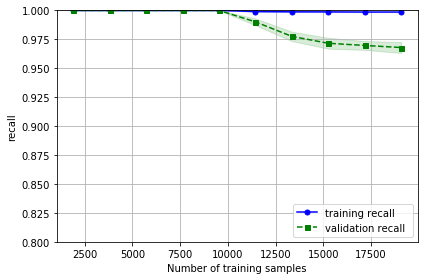

In [24]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 100, random_state = 0,
                                min_samples_leaf=1, min_samples_split =5, criterion =  'gini', 
                             max_depth= 50, max_features = 'log2', ), 
                                            X_train,  y_train, cv=10, scoring='recall', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation recall ')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('recall')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()

the max n estimators tested in the grid search was 100 maybe more than that will help.

In [22]:
clf = RandomForestClassifier(n_estimators = 200, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', ).fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[  15   93]
 [  24 1167]]
              precision    recall  f1-score   support

           0       0.38      0.14      0.20       108
           1       0.93      0.98      0.95      1191

    accuracy                           0.91      1299
   macro avg       0.66      0.56      0.58      1299
weighted avg       0.88      0.91      0.89      1299



In [20]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 0,
                                min_samples_leaf=1, min_samples_split =5, criterion =  'gini', 
                             max_depth= 50, max_features = 'log2', ).fit(X_train, y_train)



In [21]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[  16   92]
 [  20 1171]]
              precision    recall  f1-score   support

           0       0.44      0.15      0.22       108
           1       0.93      0.98      0.95      1191

    accuracy                           0.91      1299
   macro avg       0.69      0.57      0.59      1299
weighted avg       0.89      0.91      0.89      1299



### Note for Later
This was the highest f1 score we were able to get so far for cancellations.  It is a random Forest model with n =500, upsampled with very large training set and scaled.  

#### roc curve
Lets graph an roc curve with the model to see how much predictive power the model has.



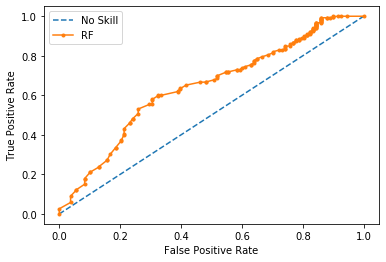

In [27]:
from sklearn.metrics import roc_curve
model = clf  # this is the model above where n = 500 
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) # can label pos_label=1
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RF') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


0.5568499860061573


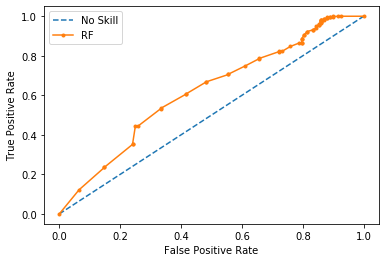

In [28]:
# roc curve with best model from grid search remember we are dealing with a very large training set and upsampled
model = RandomForestClassifier(n_estimators = 50, random_state = 0, min_samples_leaf=1, min_samples_split =2, criterion =  'entropy', 
                             max_depth= 60, max_features = 'log2', )
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RF') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


### Down Sampling
Lets try other techniques for imbalanced classification.

In [29]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [30]:
from sklearn.utils import resample

print('Number of class 1 samples before:', X_train[y_train == 1].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=False,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_downsampled.shape[0])

Number of class 1 samples before: 7905
Number of class 0 samples after: 796


In [31]:
X_train = np.vstack((X_train[y_train == 0], X_downsampled))
y_train = np.hstack((y_train[y_train == 0], y_downsampled))

In [32]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 241  165]
 [1790 2091]]
              precision    recall  f1-score   support

           0       0.12      0.59      0.20       406
           1       0.93      0.54      0.68      3881

    accuracy                           0.54      4287
   macro avg       0.52      0.57      0.44      4287
weighted avg       0.85      0.54      0.64      4287



#### Conclusion:
We  didn't get great precision with the minority class and we have worse performance with the majority class.  The overall f1 is 54.  The dataset is too small to downsample.  

## Smote (synthetic production of samples)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [34]:
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values
model = RandomForestClassifier()
# evaluate pipeline without smote using the auc roc as criteria for scoring
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.642


In [35]:
steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline with smote 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.665


smote did help but not by much lets run it on a model.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [37]:
# fit smote on the training data not the testing data
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [38]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (15770, 7)
After OverSampling, the shape of train_y: (15770,) 

After OverSampling, counts of label '1': 7885
After OverSampling, counts of label '0': 7885


In [39]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[ 100  286]
 [ 460 3441]]


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.18      0.26      0.21       386
           1       0.92      0.88      0.90      3901

    accuracy                           0.83      4287
   macro avg       0.55      0.57      0.56      4287
weighted avg       0.86      0.83      0.84      4287



the results aren't improved enough to be helpful but the official research recomends combining smote with downsampling.

In [48]:
from sklearn.utils import resample

print('Number of class 1 samples before:', X_train[y_train == 1].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=False,
                                    n_samples= 6000,
                                    random_state=123)

print('Number of class 1 samples after:', X_downsampled.shape[0])

Number of class 1 samples before: 7885
Number of class 1 samples after: 6000


In [49]:
X_train = np.vstack((X_train[y_train == 0], X_downsampled))
y_train = np.hstack((y_train[y_train == 0], y_downsampled))

In [51]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)   

In [52]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (12000, 7)
After OverSampling, the shape of train_y: (12000,) 

After OverSampling, counts of label '1': 6000
After OverSampling, counts of label '0': 6000


In [53]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 101  285]
 [ 604 3297]]
              precision    recall  f1-score   support

           0       0.14      0.26      0.19       386
           1       0.92      0.85      0.88      3901

    accuracy                           0.79      4287
   macro avg       0.53      0.55      0.53      4287
weighted avg       0.85      0.79      0.82      4287



In [54]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  94  292]
 [ 556 3345]]
              precision    recall  f1-score   support

           0       0.14      0.24      0.18       386
           1       0.92      0.86      0.89      3901

    accuracy                           0.80      4287
   macro avg       0.53      0.55      0.53      4287
weighted avg       0.85      0.80      0.82      4287



### Conclusion:

Smote isn't a quick fix to the challenge.  If there was more time the data after smote and partial downsampling could be optimized with a grid search and evaluated with a learning curve.  The results were slightly better than with the upsampling.  There are still plenty of ways to try improving the model.  

###   imblearn automatic balance

This is a mehtod of imbalanced classification where weights are balanced to penalize wrong predictions of the minority class.

In [55]:
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [56]:
from imblearn.ensemble import BalancedRandomForestClassifier


                           
clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train) 

print(clf.feature_importances_)  

rfc_pred = clf.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[0.31839366 0.04858149 0.14584345 0.14208609 0.08401095 0.10735835
 0.15372601]
[[ 202  204]
 [1383 2498]]
              precision    recall  f1-score   support

           0       0.13      0.50      0.20       406
           1       0.92      0.64      0.76      3881

    accuracy                           0.63      4287
   macro avg       0.53      0.57      0.48      4287
weighted avg       0.85      0.63      0.71      4287



In [59]:
# class balanced random forest for imbalanced classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.617


In [60]:
model.fit(X_train, y_train) 


rfc_pred = model.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  21  385]
 [   9 3872]]
              precision    recall  f1-score   support

           0       0.70      0.05      0.10       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.91      4287
   macro avg       0.80      0.52      0.52      4287
weighted avg       0.89      0.91      0.87      4287



### Result
The Roc score of .617 was lower than what was achieved above with smote and the default random Forest model.  However the precison was much better than with the unweighted models run earlier.  The recall is still pretty low with upsampling we were able to get it to 15%.  

## Isolation forest  and one class classification
to deal with the weight imbalance of our dataset we can try anamoly detection to train a model on only the majority class and let the model attempt to detect any entries which are very different from the majority class.  This is another techniques used for imbalanced classification.  Several are tried here and one class SVM is in notebook 10.

In [61]:
from sklearn.ensemble import IsolationForest

In [62]:
data = pd.read_csv("format_variables_output4.csv")
data = data[data['Target']!=2]
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den']]


In [63]:
X_train = data1[data1['Target'] == 1]
X_outliers = data1[data1['Target'] == 0]
X_train =  X_train .drop(columns=['Target']).values
X_outliers = X_outliers.drop(columns=['Target']).values

In [64]:
X_outliers

array([[3.18970000e+04, 3.73000000e+01, 8.62020000e+04, ...,
        8.23887118e-01, 2.24009615e-01, 1.16000000e+01],
       [5.22900000e+03, 3.98000000e+01, 5.75100000e+04, ...,
        7.51542575e-01, 1.89542484e-01, 3.61800000e+02],
       [7.64000000e+02, 4.16000000e+01, 5.77040000e+04, ...,
        4.50363196e-01, 1.39534884e-01, 1.26500000e+02],
       ...,
       [3.21330000e+04, 4.25000000e+01, 5.46940000e+04, ...,
        9.29135338e-01, 1.71725677e-01, 5.70880000e+03],
       [1.04290000e+04, 4.04000000e+01, 7.79340000e+04, ...,
        9.34215168e-01, 1.79156745e-01, 2.01500000e+02],
       [3.17400000e+03, 4.37000000e+01, 5.69320000e+04, ...,
        8.65715983e-01, 1.33936262e-01, 6.93000000e+01]])

In [65]:
# training the model

# contamination paramater is set to the proportion of outliers 
clf = IsolationForest(contamination=0.091, behaviour='new')
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

C:\Users\brody\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [66]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


Accuracy: 0.9099603452297644


In [67]:
# outliers ----
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])


Accuracy: 0.09068219633943428


In [68]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
# define outlier detection model
model = IsolationForest(contamination=0.091, behaviour='new')
# fit on majority class
trainX = trainX[trainy==1]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = 1
testy[testy == 0] = -1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

C:\Users\brody\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


F1 Score: 0.099


isolation forest did not predict many outliers we can detect 9% by guessing randomly.

### Local Outlier Factor to predict outliers

In [69]:
data = pd.read_csv("format_variables_output4.csv")
data = data[data['Target']!=2]
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den']]
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

In [70]:
from numpy import vstack
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor
 
# make a prediction with a lof model
def lof_predict(model, trainX, testX):
	# create one large dataset
	composite = vstack((trainX, testX))
	# make prediction on composite dataset
	yhat = model.fit_predict(composite)
	# return just the predictions on the test set
	return yhat[len(trainX):]
 
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
# define outlier detection model 
model = LocalOutlierFactor(contamination=0.091)  # contamination is the proportion of outliers
# get examples for just the majority class
trainX = trainX[trainy==0]
# detect outliers in the test set
yhat = lof_predict(model, trainX, testX)
# mark inliers 1, outliers -1
testy[testy == 1] = 1
testy[testy == 0] = -1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.095


The f1 score was even lower than with isolation forest.

# Adaboost

Sometimes different algorithms will help for an imbalanced data set.  Lets try boosting with adaboost which is simular to the Random Forest model.  

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
data = pd.read_csv("format_variables_output4.csv")
data = data[data['Target']!=2]

In [73]:
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den']]

In [75]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

In [76]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=4)


In [77]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [78]:
predictions = classifier.predict(test_X)

In [79]:
confusion_matrix(test_y, predictions)

array([[   5,  381],
       [   9, 3892]], dtype=int64)

In [80]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.07      0.00      0.00       406
           1       0.91      1.00      0.95      3881

    accuracy                           0.90      4287
   macro avg       0.49      0.50      0.48      4287
weighted avg       0.83      0.90      0.86      4287



In [81]:
#try with less estimators
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [82]:
confusion_matrix(test_y, predictions)

array([[   5,  381],
       [   9, 3892]], dtype=int64)

Lets try adaboos with upsampling

In [83]:
X_imb =  data1.drop(columns=['Target']).values
y_imb = data1['Target'].values

In [84]:
from sklearn.model_selection import train_test_split

X_train, test_X, y_train, test_y = train_test_split(X_imb, y_imb , test_size=0.33, random_state=42)

In [85]:
from sklearn.utils import resample

print('Number of class 0 samples before:', X_train[y_train == 0].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

Number of class 0 samples before: 802
Number of class 0 samples after: 7899


In [86]:
train_X = np.vstack((X_train[y_train == 1], X_upsampled))
train_y = np.hstack((y_train[y_train == 1], y_upsampled))

In [87]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)
predictions = classifier.predict(test_X)

In [88]:
# print classification report 
print(classification_report(y_test, predictions)) 
confusion_matrix(test_y, predictions)

              precision    recall  f1-score   support

           0       0.10      0.38      0.16       406
           1       0.91      0.64      0.75      3881

    accuracy                           0.61      4287
   macro avg       0.50      0.51      0.45      4287
weighted avg       0.83      0.61      0.69      4287



array([[ 183,  217],
       [1387, 2500]], dtype=int64)

terrible precision lets try it with smote

In [92]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=4)

In [93]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(train_X, train_y.ravel())

In [94]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train_res, y_train_res)
predictions = classifier.predict(test_X)

In [95]:
# print classification report 
print(classification_report(y_test, predictions)) 
confusion_matrix(test_y, predictions)

              precision    recall  f1-score   support

           0       0.09      0.38      0.15       406
           1       0.90      0.62      0.73      3881

    accuracy                           0.59      4287
   macro avg       0.50      0.50      0.44      4287
weighted avg       0.83      0.59      0.68      4287



array([[ 177,  209],
       [1466, 2435]], dtype=int64)

still terrible with the precision for the minority class.

### easy ensemble 
which creates different data sets by selecting random samples of the majority class and balancing with the minority class and using adaboost.  

In [96]:
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier


# define model
model = EasyEnsembleClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


Mean ROC AUC: 0.591


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model.fit(X_train, y_train) 

rfc_pred = model.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 218  188]
 [1698 2183]]
              precision    recall  f1-score   support

           0       0.11      0.54      0.19       406
           1       0.92      0.56      0.70      3881

    accuracy                           0.56      4287
   macro avg       0.52      0.55      0.44      4287
weighted avg       0.84      0.56      0.65      4287



This model did not perform as well as others tested above.  